In [1]:
import pyclesperanto_prototype as cle

cle.get_device()

<Apple M1 Max on Platform: Apple (2 refs)>

In [2]:
# load data (download it from https://git.mpi-cbg.de/rhaase/clij2_example_data/-/blob/master/lund1051_resampled.tif
from skimage.io import imread
image = imread('lund1051_resampled.tif')

In [3]:
import time
def stopwatch(text):
    print(text, "takes time: ", time.time() - stopwatch.start_time, " s")
    stopwatch.start_time = time.time()

In [4]:
stopwatch.start_time = time.time()

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3
Startup takes time:  2.8985509872436523  s
pushing takes time:  0.03291201591491699  s
warmup takes time:  0.6988430023193359  s
image processing takes time:  0.6303317546844482  s
Showing background subtracted input in napari takes time:  0.38132405281066895  s
Showing the result in napari takes time:  0.4596736431121826  s


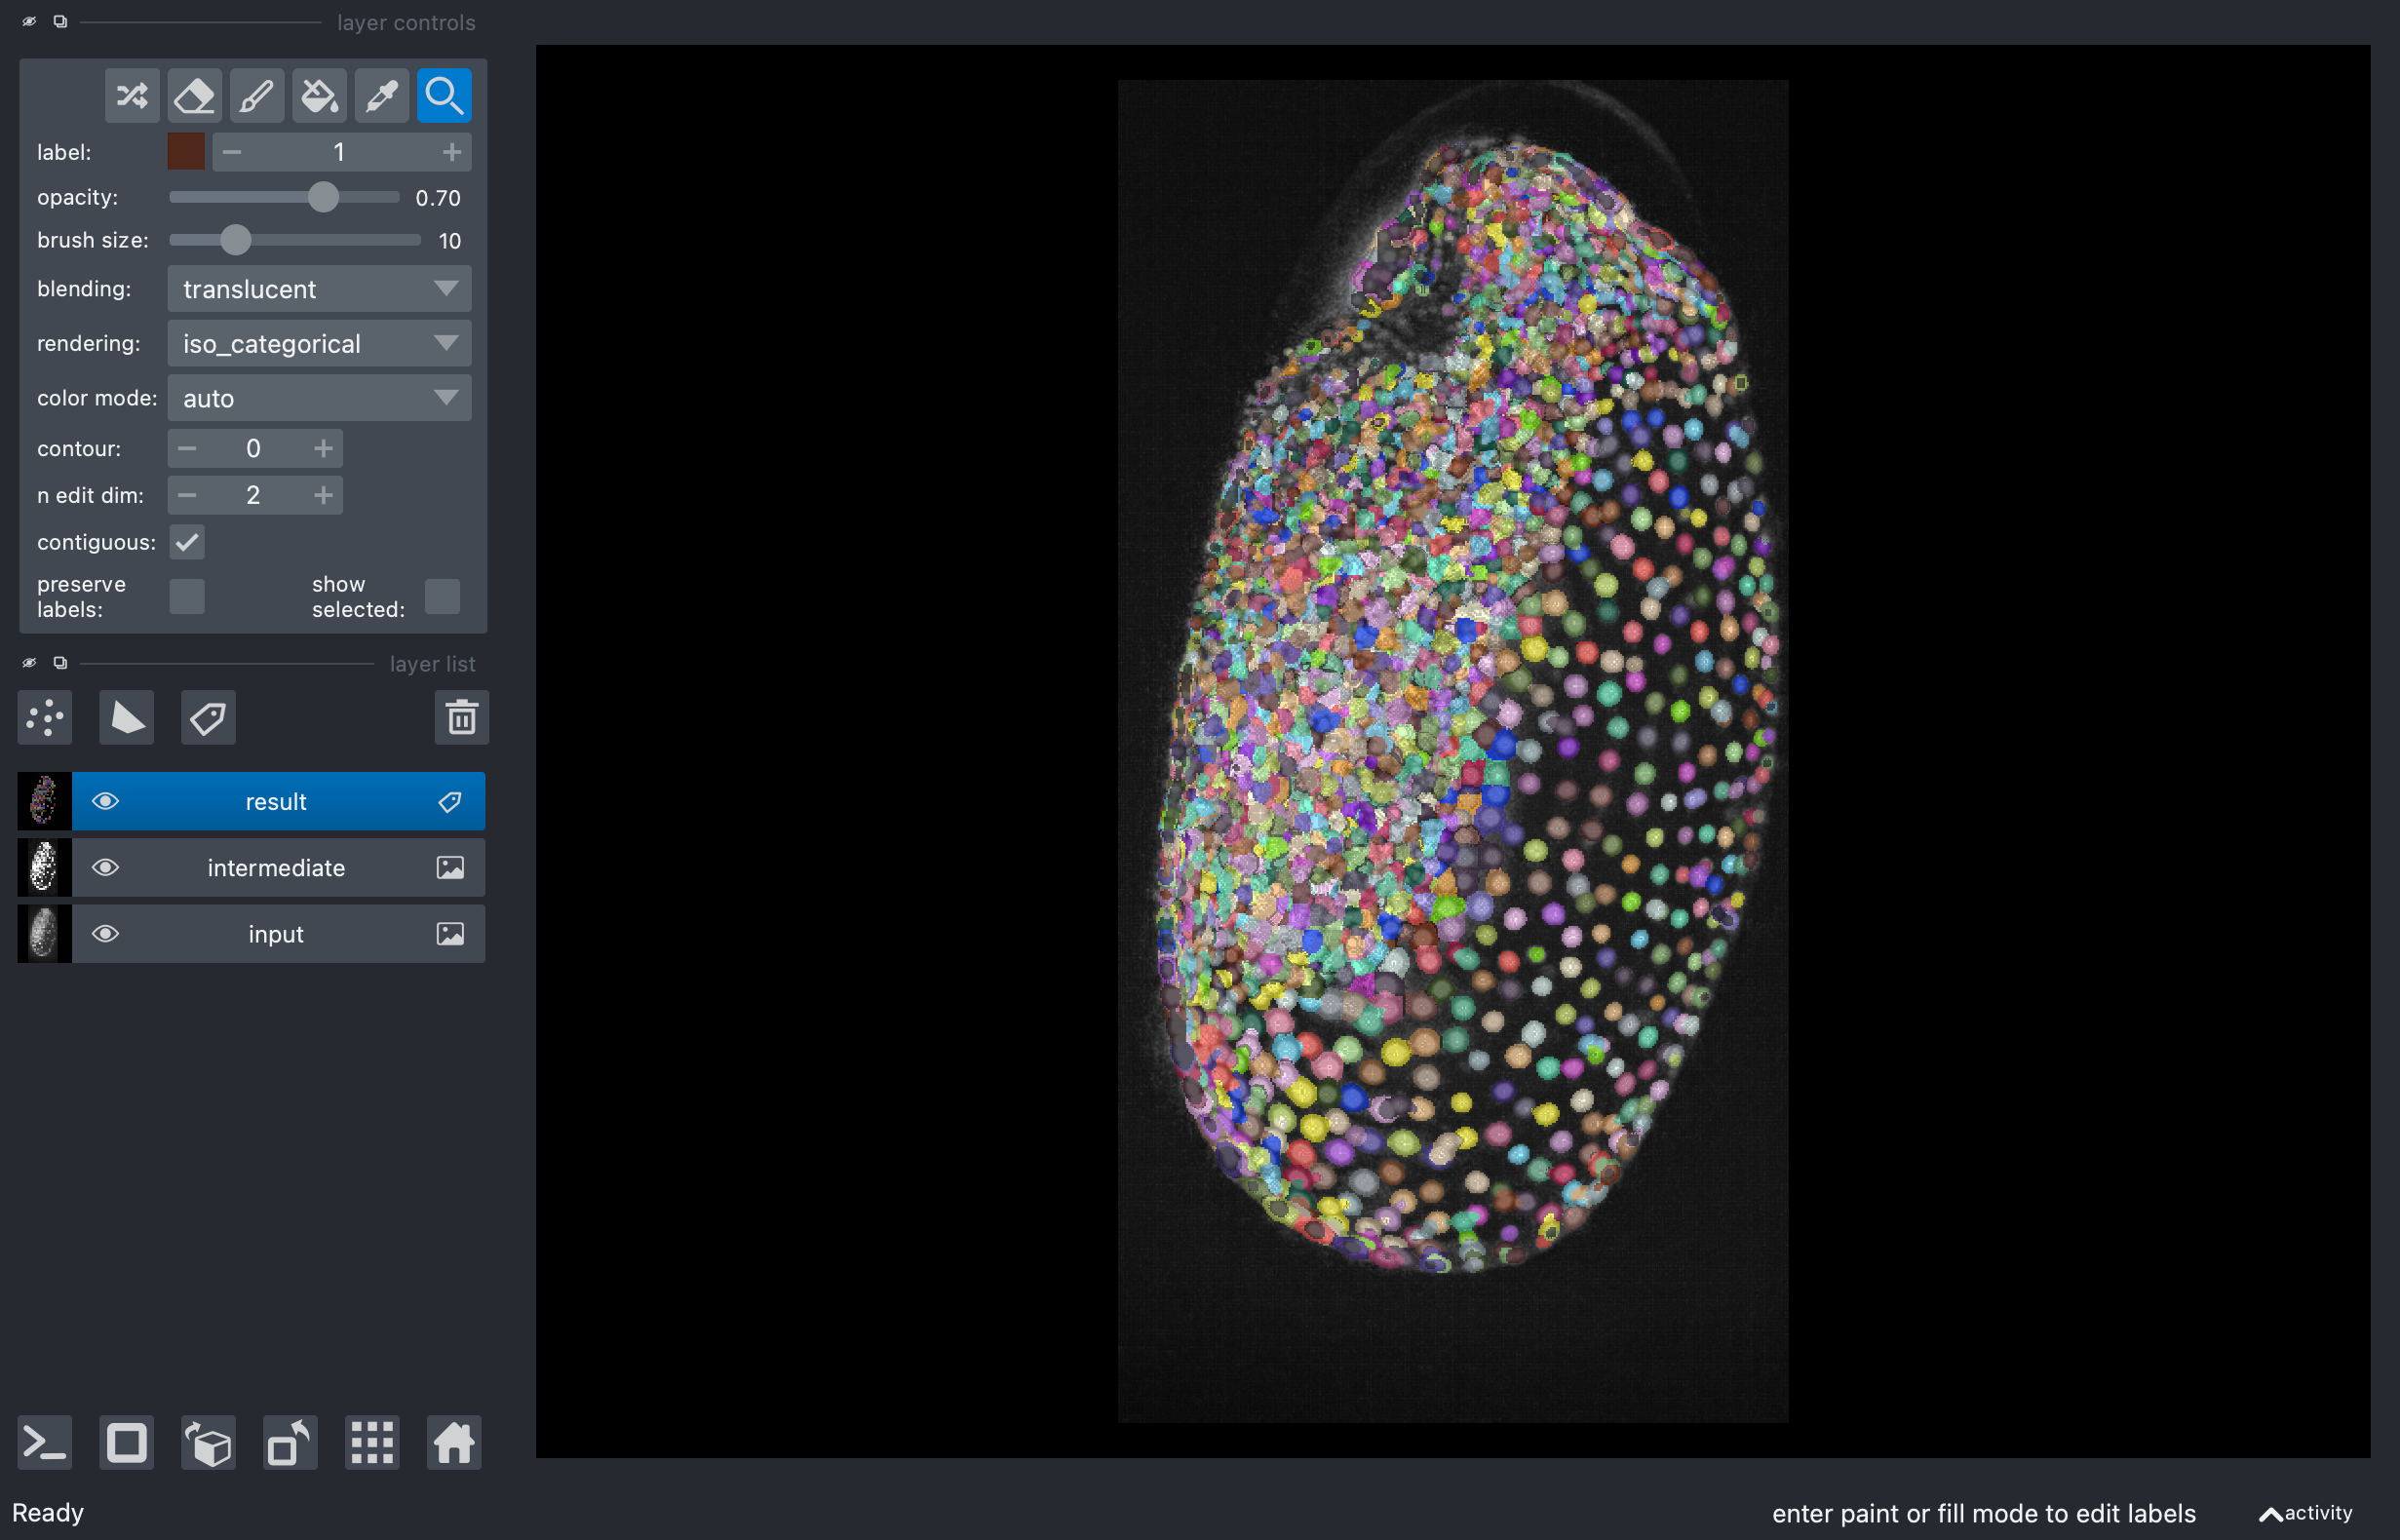

In [5]:
# start up napari
import napari

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(image, name='input')
stopwatch("Startup")

# push image to GPU
input_image = cle.push(image)
stopwatch("pushing")

# process the image + kernel compilation (warmup effect)
intermediate = cle.top_hat_box(input_image, radius_x=5, radius_y=5, radius_z=5)
result = cle.voronoi_otsu_labeling(intermediate, spot_sigma=1, outline_sigma=2)
stopwatch("warmup")

# process the image
intermediate = cle.top_hat_box(input_image, radius_x=5, radius_y=5, radius_z=5)
result = cle.voronoi_otsu_labeling(intermediate, spot_sigma=1, outline_sigma=2)
stopwatch("image processing")

# add it to napari
viewer.add_image(intermediate)
stopwatch("Showing background subtracted input in napari")
viewer.add_labels(result)
stopwatch("Showing the result in napari")

# make screenshot
napari.utils.nbscreenshot(viewer)
